In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy
# from google.colab import drive
# drive.mount('/content/gdrive')
print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content
Covid_19_predictor already Exists


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [3]:
df=pd.read_csv("data.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
countries
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
for country in countries:
    print("{0:45s}".format(country), country_population[country])


Afghanistan                                   37172386.0
Albania                                       2866376.0
Algeria                                       42228429.0
Andorra                                       77006.0
Angola                                        30809762.0
Antigua_and_Barbuda                           96286.0
Argentina                                     44494502.0
Armenia                                       2951776.0
Aruba                                         105845.0
Australia                                     24992369.0
Austria                                       8847037.0
Azerbaijan                                    9942334.0
Bahamas                                       385640.0
Bahrain                                       1569439.0
Bangladesh                                    161356039.0
Barbados                                      286641.0
Belarus                                       9485386.0
Belgium                                       11

In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break


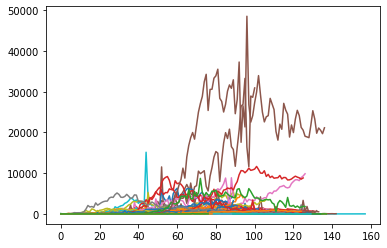

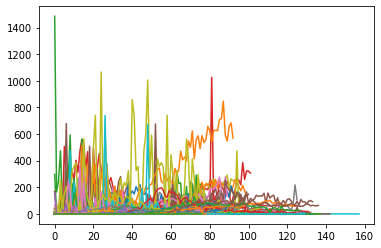

In [6]:
for country in countries:
  graph=plt.plot(country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

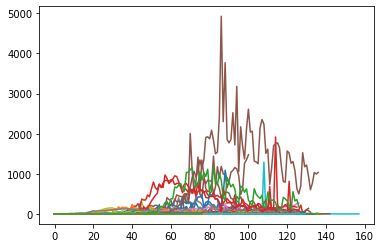

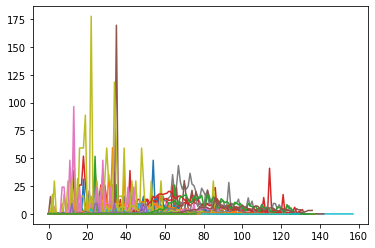

In [7]:
for country in countries:
  graph=plt.plot(country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [0]:
cummulative_country_wise_cases=dict()
cummulative_country_wise_deaths=dict()
normalised_cummulative_country_wise_cases=dict()
normalised_cummulative_country_wise_deaths=dict()

for country in countries:
  cummulative_country_wise_cases[country] = []
  cummulative_country_wise_deaths[country] = []
  cummulative_cases = 0
  cummulative_death = 0
  normalised_cummulative_country_wise_cases[country] = []
  normalised_cummulative_country_wise_deaths[country] = []
  normalised_cummulative_cases = 0
  normalised_cummulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cummulative_cases += country_wise_cases[country][index]
    cummulative_death += country_wise_deaths[country][index]
    cummulative_country_wise_cases[country].append(cummulative_cases)
    cummulative_country_wise_deaths[country].append(cummulative_death)
    normalised_cummulative_cases += normalised_country_wise_cases[country][index]
    normalised_cummulative_death += normalised_country_wise_deaths[country][index]
    normalised_cummulative_country_wise_cases[country].append(normalised_cummulative_cases)
    normalised_cummulative_country_wise_deaths[country].append(normalised_cummulative_death)

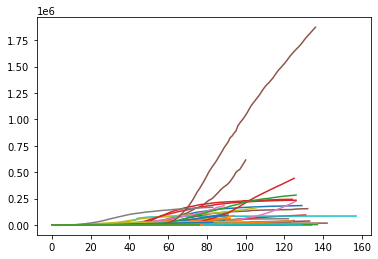

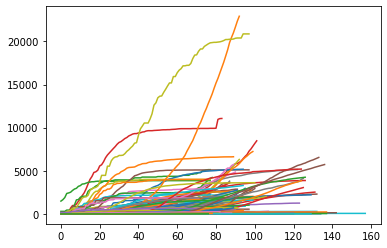

In [9]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

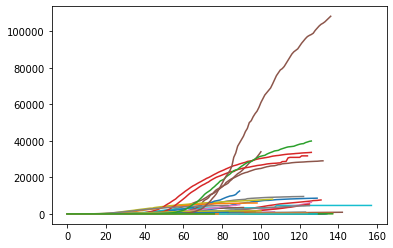

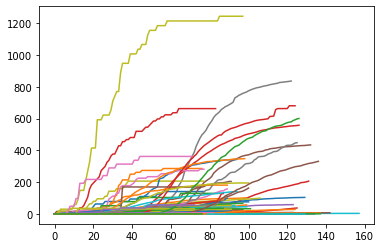

In [10]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [11]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cummulative_country_wise_cases[country][-1]),"{0:10d}".format(cummulative_country_wise_deaths[country][-1]))


Afghanistan                                        18054        300
Albania                                             1197         33
Algeria                                             9831        681
Andorra                                              852         51
Angola                                                86          4
Antigua_and_Barbuda                                   26          3
Argentina                                          19255        588
Armenia                                            11221        176
Aruba                                                101          3
Australia                                           7240        102
Austria                                            16741        670
Azerbaijan                                          6522         78
Bahamas                                              102         11
Bahrain                                            13296         21
Bangladesh                                      

In [12]:
#code to generate a list of top 15 countries with highest cummulative deaths and cases.
#generates two lists of countries which are sorted in descending order based on the cases/deaths
#adjust value of slicing to get top 10/20.
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumm_cases in zip(cummulative_country_wise_cases.keys(),cummulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumm_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumm_deaths in zip(cummulative_country_wise_deaths.keys(),cummulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumm_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))


def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
training_countries.append("India")
training_countries.remove("Brazil")
print(training_countries) 

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [13]:
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

Using TensorFlow backend.


In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [15]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

United_Kingdom (101, 1)
Italy (101, 1)
Germany (104, 1)
Spain (100, 1)
United_States_of_America (109, 1)
India (101, 1)


United_Kingdom (26, 1)
Italy (26, 1)
Germany (26, 1)
Spain (25, 1)
United_States_of_America (28, 1)
India (26, 1)


United_Kingdom (101, 1)
Italy (101, 1)
Germany (104, 1)
Spain (100, 1)
United_States_of_America (109, 1)
India (101, 1)


United_Kingdom (26, 1)
Italy (26, 1)
Germany (26, 1)
Spain (25, 1)
United_States_of_America (28, 1)
India (26, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases,100):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, 25):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths,100):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, 25):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset_deaths[country]["y"] = y_test

In [17]:
arr_buff_cases = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_cases[country]["X"].shape
    buff["y_train"] = trainset_cases[country]["y"].shape
    buff["X_test"] = testset_cases[country]["X"].shape
    buff["y_test"] = testset_cases[country]["y"].shape
    arr_buff_cases.append(buff)

pd.DataFrame(arr_buff_cases, index=training_countries)

arr_buff_deaths = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_deaths[country]["X"].shape
    buff["y_train"] = trainset_deaths[country]["y"].shape
    buff["X_test"] = testset_deaths[country]["X"].shape
    buff["y_test"] = testset_deaths[country]["y"].shape
    arr_buff_deaths.append(buff)

pd.DataFrame(arr_buff_deaths, index=training_countries)

,X_train,y_train,X_test,y_test
United_Kingdom,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
Italy,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
Germany,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_States_of_America,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
India,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"


In [0]:
total_error = dict()
model_types = ["LSTM", "GRU"]
for model_type in model_types:
  total_error[model_type] = dict()
  total_error[model_type]["Cases"] = 0
  total_error[model_type]["Deaths"] = 0
  
def lagging(df, lag):
    df_pred = pd.Series(df["Pred"].reshape(-1))
    df_true = pd.Series(df["True"].reshape(-1))
    
    df_pred_lag = df_pred.shift(lag)
    
    # print("MSE without Lag :", mean_squared_error(np.array(df_true), np.array(df_pred)))
    MSE_lag = mean_squared_error(np.array(df_true[:-lag]), np.array(df_pred_lag[:-lag]))
    print("MSE with Lag    :", MSE_lag)

    # plt.figure(figsize=(14,4))
    # plt.title("Prediction without Lag")
    # plt.plot(df_true, color='green')
    # plt.plot(df_pred, color='blue')
    # plt.legend(["True", "Predicted"])

    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag")
    plt.plot(df_true, color='green')
    plt.plot(df_pred_lag, color='blue')
    plt.legend(["True", "Predicted"])

    return MSE_lag


Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1107
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0729
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0719
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0403
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0290
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0202
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0195
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0214
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0413
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0297
Fitting 

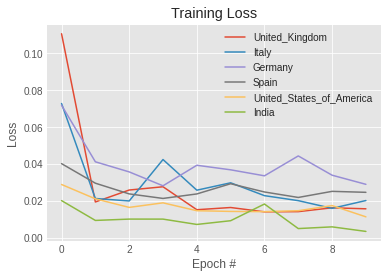

In [19]:
%%time
epochs = 10
# The LSTM architecture
regressor_cases = Sequential()
# First LSTM layer with Dropout regularisation
regressor_cases.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_cases,1)))
regressor_cases.add(Dropout(0.2))
# Second LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.2))
# Third LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.5))
# Fourth LSTM layer
regressor_cases.add(LSTM(units=50))
regressor_cases.add(Dropout(0.5))
# The output layer
regressor_cases.add(Dense(units=1))

# Compiling the RNN
regressor_cases.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 1s 12ms/step - loss: 0.1469
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0802
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0734
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0603
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0242
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0154
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0476
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0193
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0397
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0280
Fitting 

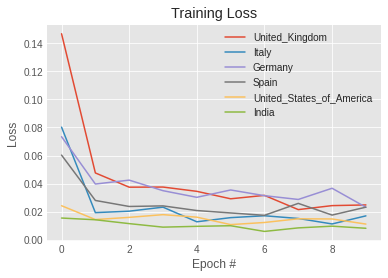

In [20]:
%%time
# epochs = 5
# The LSTM architecture
regressor_deaths = Sequential()
# First LSTM layer with Dropout regularisation
regressor_deaths.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_deaths,1)))
regressor_deaths.add(Dropout(0.2))
# Second LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.2))
# Third LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.5))
# Fourth LSTM layer
regressor_deaths.add(LSTM(units=50))
regressor_deaths.add(Dropout(0.5))
# The output layer
regressor_deaths.add(Dense(units=1))

# Compiling the RNN
regressor_deaths.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressor_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressor_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 7.3000681301076185
MSE with Lag    : 1.3057073238913077
MSE with Lag    : 0.23617298282101604
MSE with Lag    : 0.5827353713244866
MSE with Lag    : 25.586783347082598
MSE with Lag    : 0.041735732996187797


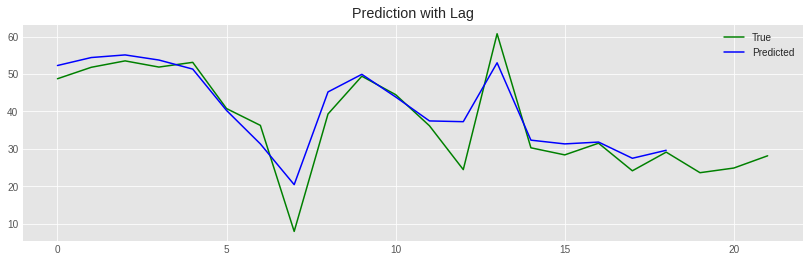

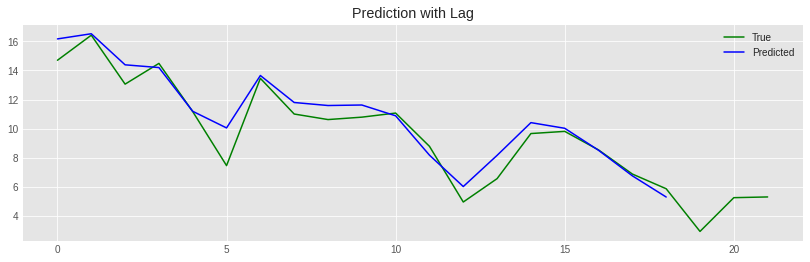

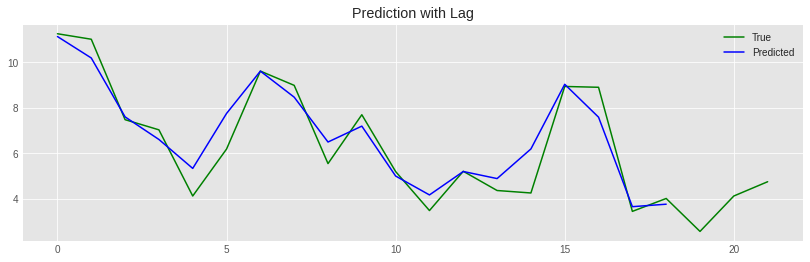

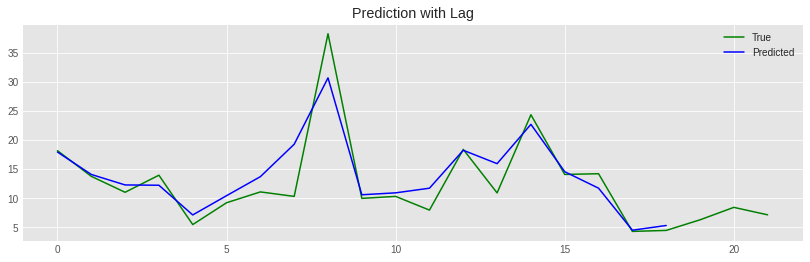

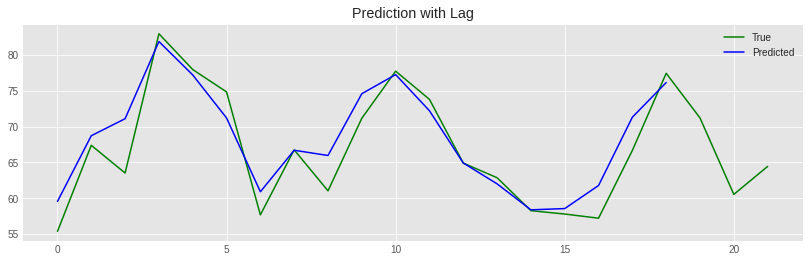

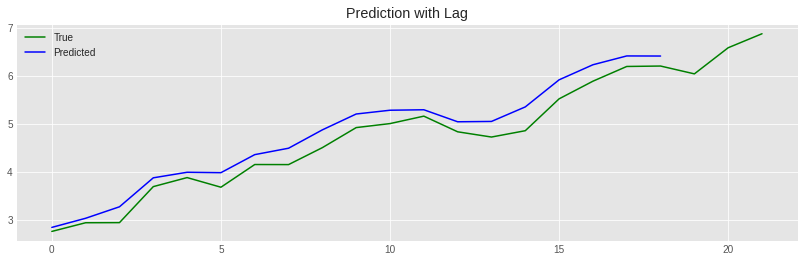

In [22]:
total_error["LSTM"]["Cases"] = 0
for country in training_countries:
  total_error["LSTM"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 0.7004102087224421
MSE with Lag    : 0.66992269751329
MSE with Lag    : 0.05167575916105658
MSE with Lag    : 0.22944354321310365
MSE with Lag    : 0.5899909505719902
MSE with Lag    : 4.318495879219002e-05


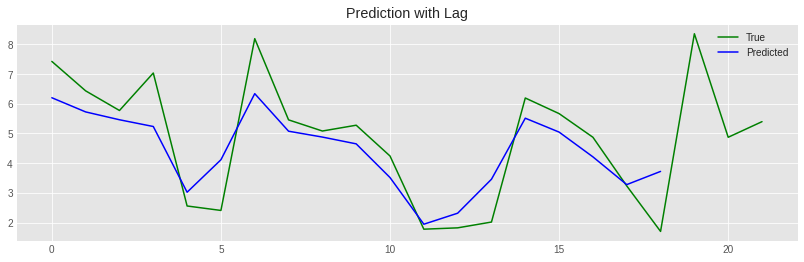

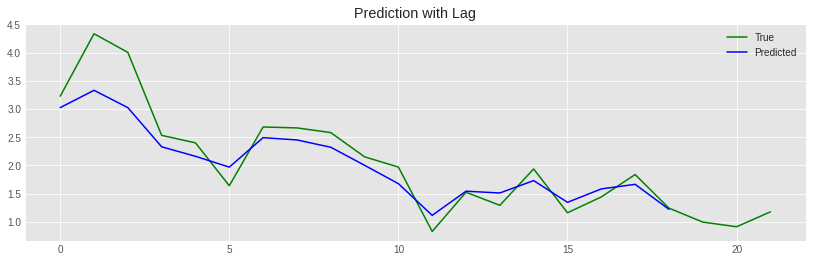

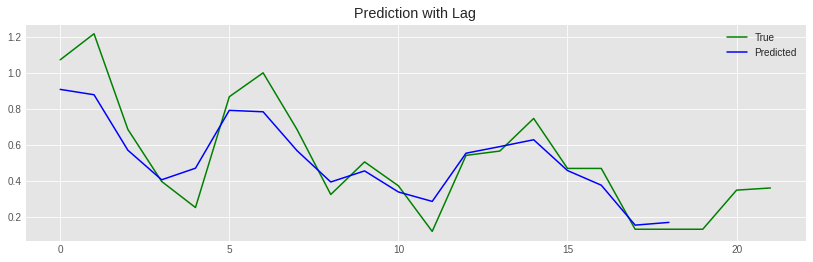

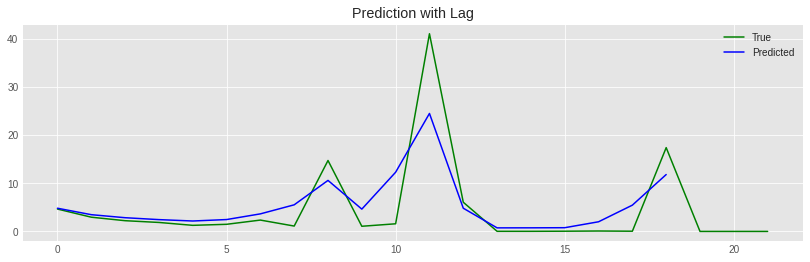

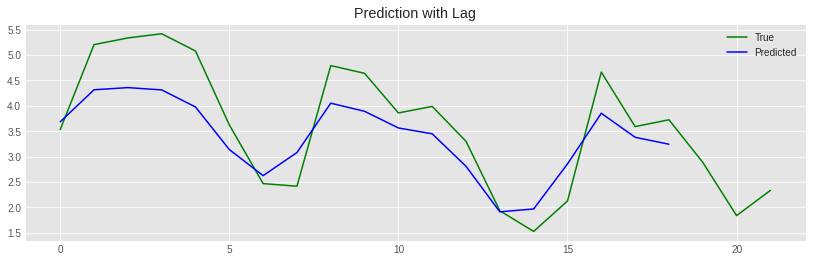

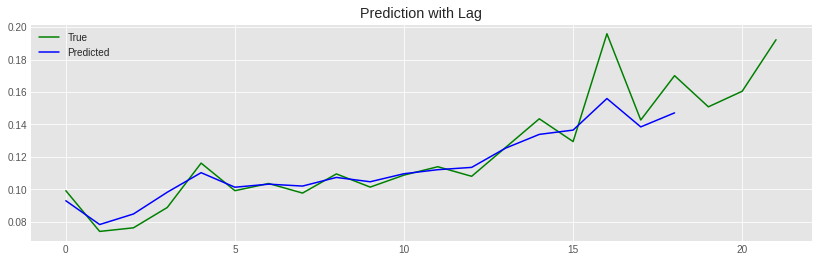

In [23]:
total_error["LSTM"]["Deaths"] = 0
for country in training_countries:
  total_error["LSTM"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1078
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0964
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1382
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0814
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0803
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0586
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0857
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0842
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1109
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0720
Fitting 

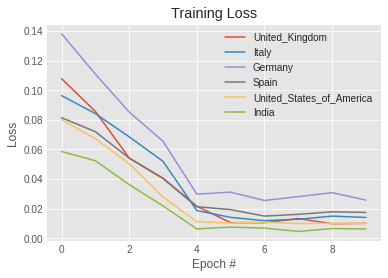

In [24]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_cases = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Second GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Third GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_cases.add(GRU(units=50, activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# The output layer
regressorGRU_cases.add(Dense(units=1))
# Compiling the RNN
regressorGRU_cases.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1576
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0871
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1379
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1079
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0374
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0293
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1293
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0775
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0997
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0916
Fitting 

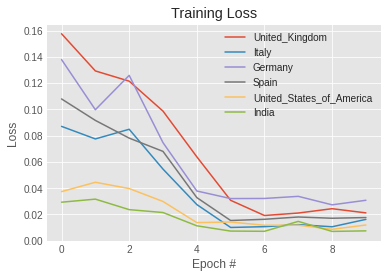

In [25]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_deaths = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Second GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Third GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_deaths.add(GRU(units=50, activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# The output layer
regressorGRU_deaths.add(Dense(units=1))
# Compiling the RNN
regressorGRU_deaths.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressorGRU_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressorGRU_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 3.5410634320946417
MSE with Lag    : 0.9691343085522832
MSE with Lag    : 2.2167159377219074
MSE with Lag    : 2.0232260123055723
MSE with Lag    : 40.884879540358014
MSE with Lag    : 0.15627376118211248


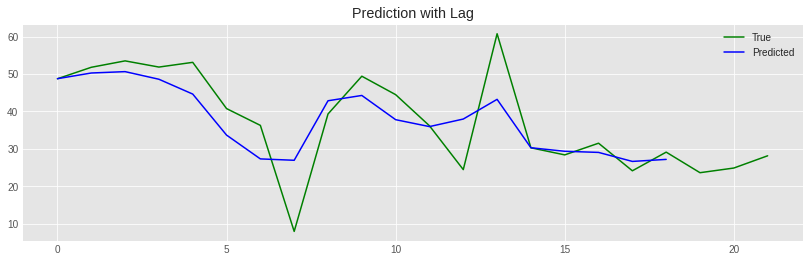

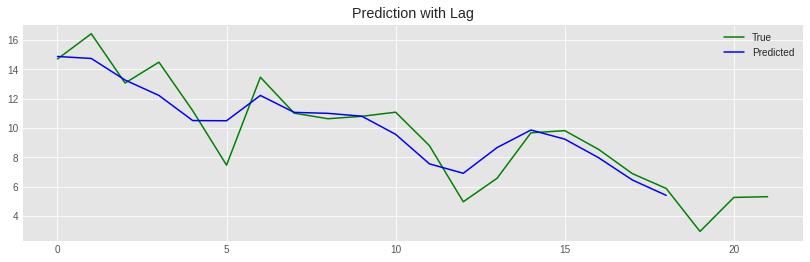

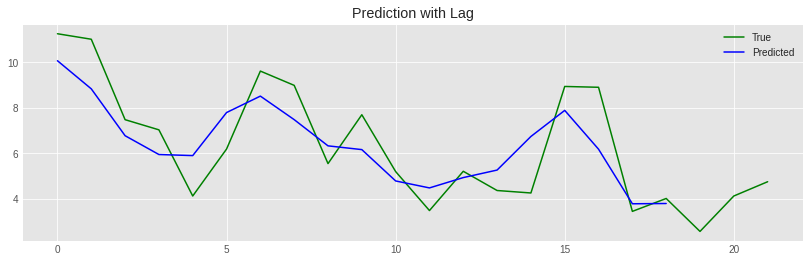

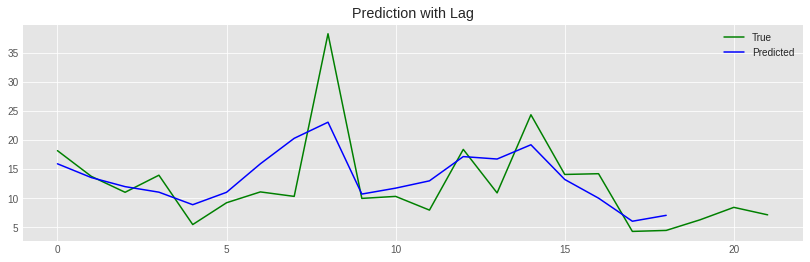

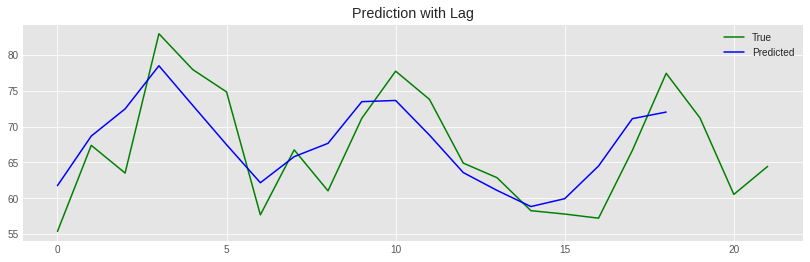

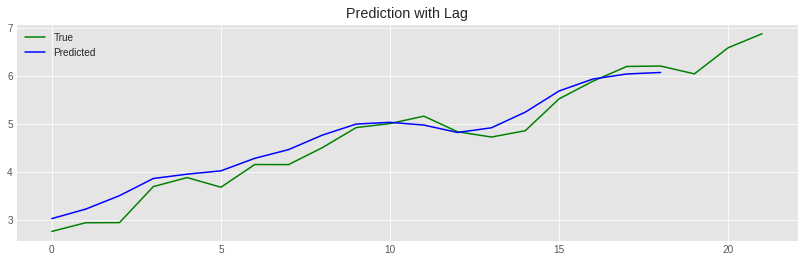

In [27]:
total_error["GRU"]["Cases"] = 0
for country in training_countries:
  total_error["GRU"]["Cases"] +=lagging(pred_result_cases[country], -3)

MSE with Lag    : 0.31942411948039995
MSE with Lag    : 0.45858622465147486
MSE with Lag    : 0.05483915909436236
MSE with Lag    : 0.22436572384286854
MSE with Lag    : 0.22842795401722482
MSE with Lag    : 0.00010746433110511303


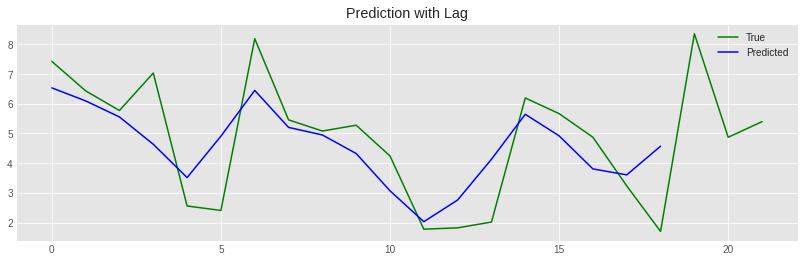

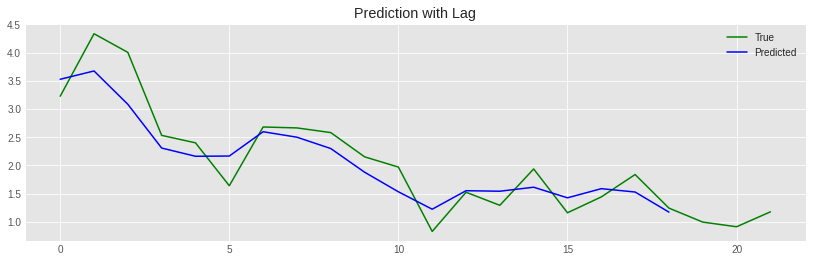

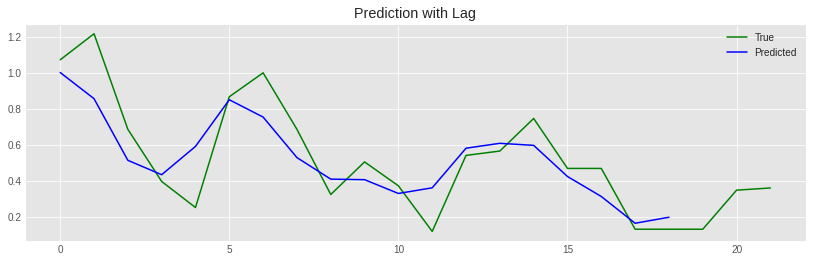

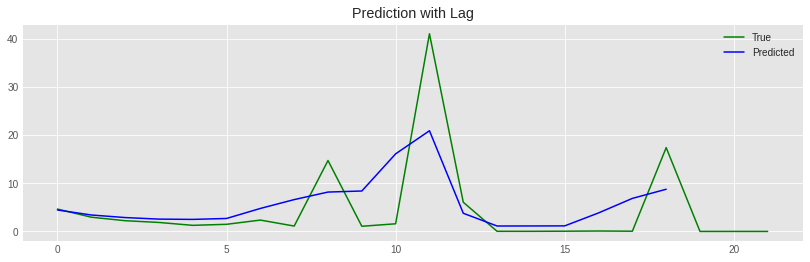

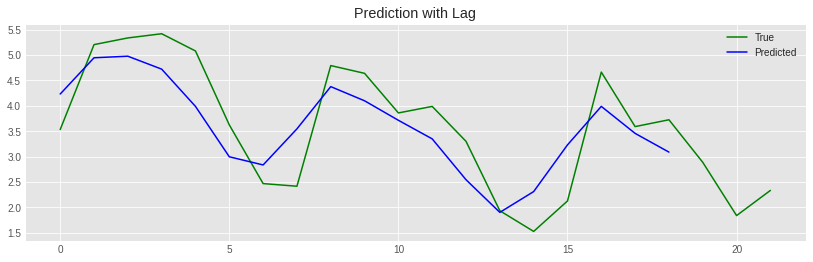

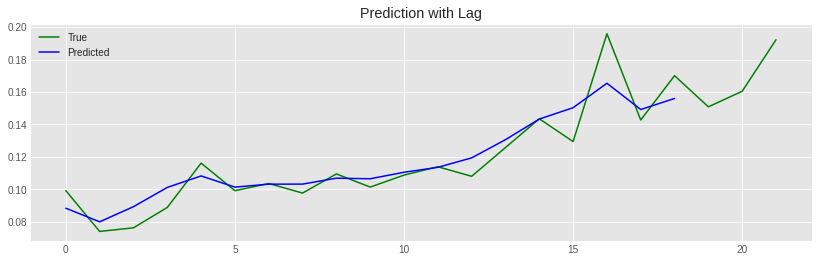

In [28]:
total_error["GRU"]["Deaths"] = 0
for country in training_countries:
  total_error["GRU"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [29]:
for model_type in model_types:
  print("{0:5s}".format(model_type), total_error[model_type])

LSTM  {'Cases': 35.05320288822321, 'Deaths': 2.2414863441406747}
GRU   {'Cases': 49.79129299221453, 'Deaths': 1.2857506454174359}
